In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/akhil/.local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_excel('Email Performance Analytics _Data.xlsx')

**Midascontactid**-Unique Id assigned to each contact or Email

**Createdat**-Account creation date

**Emailpermissionstatus**-Email permission when the data was pulled I-Opted in O-Opted out U-Did not opt in or out

**Cont.Acq.Src**-Customer acquired source independent of email permission status

**Email.Src.First**-Customer acquired source when first received email permission from customer

**Segment**-Consumer segment

**Segmentsecondary**-Secondary consumer segment

**Email.Acq.Dt**-Customer Email acquired date

**Email.Pref.Ch.Dt**-Email preference change date

**Entry.Point.List**-Pipe delimited filed of all the sources that contact has come through

**Cont.Acq.Src2**-Customer acquired source-duplicate to Cont.Acq.Src2

**Cont.Acq.Dte**-Customer acquired source-date(maybe duplicate to email acq date)

**Prod.Buy.Last**-Recent purchase date

**Prod.Buy.First**-First purchase date

**Prod.Buy.Accessorie**-Date where product category is bought

**Prod.Buy.All.In.One.Desktop**-Date where product category is bought

**Prod.Buy.Desktop**-Date where product category is bought

**Prod.Buy.Idc**-Date where product category is bought

**Prod.Buy.Idpd**-Date where product category is bought

**Prod.Buy.Laptop**-Date where product category is bought

**Prod.Buy.Servers**-Date where product category is bought

**Prod.Buy.Software**-Date where product category is bought

**Prod.Buy.Thnkc**-Date where product category is bought

**Prod.Buy.Thnkp**-Date where product category is bought

**Prod.Buy.Warranties**-Date where product category is bought

**Prod.Buy.Workstation**-Date where product category is bought

**Prod.Buy.Android.Tablet**-Date where product category is bought

**Prod.Buy.Windows.Tablet**-Date where product category is bought

**Prod.Buy.Convertible**-Date where product category is bought

**Prod.Buy.Android.Os**-Date where product category is bought

**Prod.Buy.Gaming**-Date where product category is bought

**Prod.Buy.Windows.Os**-Date where product category is bought

**Prod.Buy.Gaming.Related**-Date where product category is bought

**Country**-Country-us & CA

**Eml.Sent.Num**-Number of emails sent

**Eml.Sent.First.Ts**-First email sent date

**Eml.Sent.Last.Ts**-Last email sent date

**Eml.Open.Num**-Number of emails Opened

**Eml.Open.First.Ts**-First email Open date

**Eml.Open.Last.Ts**-Last email Open date

**Eml.Click.Num**-Number of emails Clicked

**Eml.Click.First.Ts**-First email Click date

**Eml.Click.Last.Ts**-Last email Click date

**Eml.Bounce.Last.Ts**-Last email Bounce date

**Eml.Unsub.Last.Ts**-Last email Unsubscribed date

**Eml.Spam.Last.Ts**-Last email Spam date

**Email.Domain**-email domain-gmail,yahoo

**Em.Pref.Status**-might be duplicate-source -marketo

**Em.Pref.Dte**-Might be duplicate-source-marketo

**Invalid.Email.Dte**-Date when email recognized as invalid

**Em.Spamclplt.Dte**-customer log spam complaint date


In [3]:
df.head()

,Midascontactid,Createdat,Emailpermissionstatus,Cont.Acq.Src,Email.Src.First,Segment,Segmentsecondary,Email.Acq.Dt,Email.Pref.Ch.Dt,Entry.Point.List,...,Eml.Click.First.Ts,Eml.Click.Last.Ts,Eml.Bounce.Last.Ts,Eml.Unsub.Last.Ts,Eml.Spam.Last.Ts,Email.Domain,Em.Pref.Status,Em.Pref.Dte,Invalid.Email.Dte,Em.Spamclplt.Dte
0,1020375449,2019-04-23,I,LIDUAS16,OOBWIN15,CON,NaN,2019-04-22,2019-08-24,|LIDUAS1608|OOBAND1407|OOBWIN1506|,...,2019-08-21,2019-08-21,NaT,NaT,NaT,gmail.com,I,2019-08-24,NaT,NaN
1,1042778096,2019-10-16,U,OOBWIN15,NaN,CON,NaN,NaT,2019-10-15,|OOBWIN1506|,...,NaT,NaT,NaT,NaT,NaT,hotmail.com,U,2019-10-15,NaT,NaN
2,1039527195,2019-07-29,I,NETMINNG,NETMINNG,CON,NaN,2019-07-29,2019-07-30,|HYBRIS1506|IGNONE20121024|SAPCRMSHIP120501|,...,NaT,NaT,NaT,NaT,NaT,hotmail.com,I,2019-07-30,NaT,NaN
3,1008356168,2019-11-29,I,EPI2,EPI2,CON,NaN,2015-11-04,2019-11-29,|HYBRIS1506|LENI2|OOBWIN1407|OOBWIN1506|RI6 PE...,...,2016-07-28,2016-08-06,NaT,2016-11-03,NaT,gmail.com,I,2019-11-29,NaT,NaN
4,1038164470,2019-04-30,U,OOBWIN15,NaN,CON,NaN,NaT,2019-04-29,|OOBWIN1506|,...,2019-05-26,2019-05-26,NaT,NaT,NaT,hotmail.com,U,2019-04-29,NaT,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Midascontactid               10000 non-null  int64         
 1   Createdat                    10000 non-null  datetime64[ns]
 2   Emailpermissionstatus        10000 non-null  object        
 3   Cont.Acq.Src                 9943 non-null   object        
 4   Email.Src.First              6274 non-null   object        
 5   Segment                      10000 non-null  object        
 6   Segmentsecondary             87 non-null     object        
 7   Email.Acq.Dt                 6274 non-null   datetime64[ns]
 8   Email.Pref.Ch.Dt             9943 non-null   datetime64[ns]
 9   Entry.Point.List             9943 non-null   object        
 10  Cont.Acq.Src2                9943 non-null   object        
 11  Cont.Acq.Dte                 9943 non-null

In [5]:
df.describe()

,Midascontactid,Prod.Buy.Software,Eml.Sent.Num,Eml.Open.Num,Eml.Click.Num,Em.Spamclplt.Dte
count,1.000000e+04,0.0,9859.000000,9859.000000,9859.000000,0.0
mean,1.025421e+09,NaN,18.090881,3.526423,0.421645,NaN
std,1.143535e+08,NaN,35.222399,14.974394,2.166769,NaN
min,2.000102e+08,NaN,0.000000,0.000000,0.000000,NaN
25%,1.039377e+09,NaN,1.000000,0.000000,0.000000,NaN
50%,1.042088e+09,NaN,3.000000,0.000000,0.000000,NaN
75%,1.044632e+09,NaN,17.000000,2.000000,0.000000,NaN
max,1.047128e+09,NaN,267.000000,572.000000,81.000000,NaN


### Checking for categorical variables

In [6]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

Emailpermissionstatus : ['I' 'U' 'O']
Segment : ['CON' 'VSB' 'SMB' 'AFF' 'EPP' 'PS' 'GLB' 'CPT' 'T2']
Segmentsecondary : [nan 'AFF' 'CON']
Country : ['US' 'CA' 'us']
Em.Pref.Status : ['I' 'U' 'O']


### Checking for numerical variables

In [7]:
numerical_col = []
for column in df.columns:
    if df[column].dtype != object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

Prod.Buy.Accessories : [                          'NaT' '2012-04-02T00:00:00.000000000'
 '2012-08-21T00:00:00.000000000' '2012-03-19T00:00:00.000000000'
 '2014-01-26T00:00:00.000000000' '2010-09-02T00:00:00.000000000'
 '2010-12-15T00:00:00.000000000' '2013-09-16T00:00:00.000000000'
 '2010-12-23T00:00:00.000000000' '2014-03-14T00:00:00.000000000'
 '2014-08-16T00:00:00.000000000' '2011-01-21T00:00:00.000000000'
 '2014-06-03T00:00:00.000000000' '2012-05-17T00:00:00.000000000'
 '2013-02-07T00:00:00.000000000' '2012-12-12T00:00:00.000000000'
 '2011-12-08T00:00:00.000000000' '2011-10-05T00:00:00.000000000'
 '2014-03-23T00:00:00.000000000' '2013-02-20T00:00:00.000000000'
 '2011-02-17T00:00:00.000000000' '2010-08-30T00:00:00.000000000'
 '2011-03-10T00:00:00.000000000' '2012-11-29T00:00:00.000000000'
 '2011-08-26T00:00:00.000000000' '2011-06-16T00:00:00.000000000'
 '2013-12-01T00:00:00.000000000' '2012-03-12T00:00:00.000000000'
 '2013-03-18T00:00:00.000000000' '2013-12-10T00:00:00.000000000'
 '

### Plotting a heatmap to check the number of missing values

<AxesSubplot:>

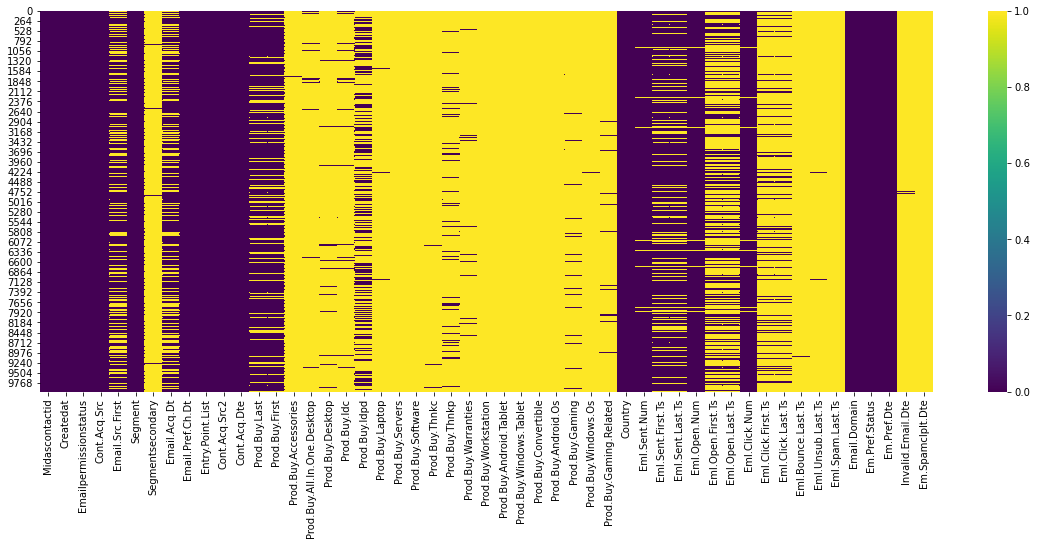

In [8]:
plt.figure(figsize=(20,7))
sns.heatmap(df.isnull(), cmap='viridis')

### Calculating the percentage of missing values

In [9]:
percent_missing = df.isnull().sum() * 100 / len(df)
# print(percent_missing)
missing_values = pd.DataFrame({'column_name' : df.columns,
                              '% missing values' : percent_missing})
missing_values

,column_name,% missing values
Midascontactid,Midascontactid,0.00
Createdat,Createdat,0.00
Emailpermissionstatus,Emailpermissionstatus,0.00
Cont.Acq.Src,Cont.Acq.Src,0.57
Email.Src.First,Email.Src.First,37.26
Segment,Segment,0.00
Segmentsecondary,Segmentsecondary,99.13
Email.Acq.Dt,Email.Acq.Dt,37.26
Email.Pref.Ch.Dt,Email.Pref.Ch.Dt,0.57
Entry.Point.List,Entry.Point.List,0.57


* We can see that from above data frame there are almost more than 90% of missing values so we can drop them

In [10]:
# Invalid.Email.Dte,Em.Spamclplt.Dte,Eml.Spam.Last.Ts,Eml.Unsub.Last.Ts,Eml.Bounce.Last.Ts,Eml.Click.Last.Ts,
# Eml.Click.First.Ts, Prod.Buy.Gaming.Related, Prod.Buy.Windows.Os, Prod.Buy.Gaming, Prod.Buy.Android.Os, 
# Prod.Buy.Convertible, Prod.Buy.Windows.Tablet, Prod.Buy.Android.Tablet, Prod.Buy.Workstation, Prod.Buy.Warranties,
# Prod.Buy.Thnkp, Prod.Buy.Thnkc, Prod.Buy.Software, Prod.Buy.Servers, Prod.Buy.Laptop, Prod.Buy.Idc, Prod.Buy.Desktop,
# Prod.Buy.All.In.One.Desktop, Prod.Buy.Accessories, Segmentsecondary

### Feature Engineering

In [11]:
df = df.drop(['Invalid.Email.Dte','Em.Spamclplt.Dte','Eml.Spam.Last.Ts','Eml.Unsub.Last.Ts','Eml.Bounce.Last.Ts','Eml.Click.Last.Ts',
'Eml.Click.First.Ts', 'Prod.Buy.Gaming.Related', 'Prod.Buy.Windows.Os', 'Prod.Buy.Gaming', 'Prod.Buy.Android.Os', 
'Prod.Buy.Convertible', 'Prod.Buy.Windows.Tablet', 'Prod.Buy.Android.Tablet', 'Prod.Buy.Workstation', 'Prod.Buy.Warranties',
'Prod.Buy.Thnkp', 'Prod.Buy.Thnkc', 'Prod.Buy.Software', 'Prod.Buy.Servers', 'Prod.Buy.Laptop', 'Prod.Buy.Idc', 'Prod.Buy.Desktop',
'Prod.Buy.All.In.One.Desktop', 'Prod.Buy.Accessories', 'Segmentsecondary'], axis=1)

In [12]:
df.head()

,Midascontactid,Createdat,Emailpermissionstatus,Cont.Acq.Src,Email.Src.First,Segment,Email.Acq.Dt,Email.Pref.Ch.Dt,Entry.Point.List,Cont.Acq.Src2,...,Eml.Sent.Num,Eml.Sent.First.Ts,Eml.Sent.Last.Ts,Eml.Open.Num,Eml.Open.First.Ts,Eml.Open.Last.Ts,Eml.Click.Num,Email.Domain,Em.Pref.Status,Em.Pref.Dte
0,1020375449,2019-04-23,I,LIDUAS16,OOBWIN15,CON,2019-04-22,2019-08-24,|LIDUAS1608|OOBAND1407|OOBWIN1506|,LIDUAS16,...,228.0,2017-03-03,2020-02-20,41.0,2017-03-11,2020-02-17,1.0,gmail.com,I,2019-08-24
1,1042778096,2019-10-16,U,OOBWIN15,NaN,CON,NaT,2019-10-15,|OOBWIN1506|,OOBWIN15,...,2.0,2019-11-25,2019-12-24,0.0,NaT,NaT,0.0,hotmail.com,U,2019-10-15
2,1039527195,2019-07-29,I,NETMINNG,NETMINNG,CON,2019-07-29,2019-07-30,|HYBRIS1506|IGNONE20121024|SAPCRMSHIP120501|,NETMINNG,...,121.0,2019-07-29,2020-02-20,4.0,2019-07-29,2020-02-17,0.0,hotmail.com,I,2019-07-30
3,1008356168,2019-11-29,I,EPI2,EPI2,CON,2015-11-04,2019-11-29,|HYBRIS1506|LENI2|OOBWIN1407|OOBWIN1506|RI6 PE...,EPI2,...,15.0,2019-11-29,2020-01-13,2.0,2016-07-28,2016-08-06,2.0,gmail.com,I,2019-11-29
4,1038164470,2019-04-30,U,OOBWIN15,NaN,CON,NaT,2019-04-29,|OOBWIN1506|,OOBWIN15,...,20.0,2019-04-30,2019-05-24,1.0,2019-05-01,2019-05-26,1.0,hotmail.com,U,2019-04-29


### Exploring the date time column

`Eml.Sent.Num` - Number of emails sent

`Eml.Sent.First.Ts` - First email sent date

`Eml.Sent.Last.Ts` - Last email sent date

`Eml.Open.Num` - Number of emails Opened

`Eml.Open.First.Ts` - First email Open date

`Eml.Open.Last.Ts` - Last email Open date

`Eml.Click.Num` - Number of emails Clicked

`Eml.Click.First.Ts` - First email Click date

`Eml.Click.Last.Ts` - Last email Click date

`Eml.Bounce.Last.Ts` - Last email Bounce date

`Eml.Unsub.Last.Ts` - Last email Unsubscribed date

`Eml.Spam.Last.Ts` - Last email Spam date


In [13]:
# Extracting date, month & year from `Eml.Sent.Num` column

df['Email_Sent_Day'] = pd.to_datetime(df['Eml.Sent.Num']).dt.day
df['Email_Sent_Month'] = pd.to_datetime(df['Eml.Sent.Num']).dt.month
df['Email_Sent_Year'] = pd.to_datetime(df['Eml.Sent.Num']).dt.year

In [14]:
# Extracting date, month & year from `Eml.Sent.First.Ts` column

df['First_Email_Sent_Day'] = pd.to_datetime(df['Eml.Sent.First.Ts']).dt.day
df['First_Email_Sent_Month'] = pd.to_datetime(df['Eml.Sent.First.Ts']).dt.month
df['First_Email_Sent_Year'] = pd.to_datetime(df['Eml.Sent.First.Ts']).dt.year

In [15]:
# Extracting date, month & year from `Eml.Sent.Last.Ts` column

df['Last_Email_Sent_Day'] = pd.to_datetime(df['Eml.Sent.Last.Ts']).dt.day
df['Last_Email_Sent_Month'] = pd.to_datetime(df['Eml.Sent.Last.Ts']).dt.month
df['Last_Email_Sent_Year'] = pd.to_datetime(df['Eml.Sent.Last.Ts']).dt.year

In [16]:
# Extracting date, month & year from `Eml.Sent.Last.Ts` column

df['No_Email_Opened_Day'] = pd.to_datetime(df['Eml.Open.Num']).dt.day
df['No_Email_Opened_Month'] = pd.to_datetime(df['Eml.Open.Num']).dt.month
df['No_Email_Opened_Year'] = pd.to_datetime(df['Eml.Open.Num']).dt.year

In [17]:
# Extracting date, month & year from `Eml.Open.First.Ts` column

df['First_Email_Opened_Day'] = pd.to_datetime(df['Eml.Open.First.Ts']).dt.day
df['First_Email_Opened_Month'] = pd.to_datetime(df['Eml.Open.First.Ts']).dt.month
df['First_Email_Opened_Year'] = pd.to_datetime(df['Eml.Open.First.Ts']).dt.year

In [18]:
# Extracting date, month & year from `Eml.Open.Last.Ts` column

df['Last_Email_Opened_Day'] = pd.to_datetime(df['Eml.Open.Last.Ts']).dt.day
df['Last_Email_Opened_Month'] = pd.to_datetime(df['Eml.Open.Last.Ts']).dt.month
df['Last_Email_Opened_Year'] = pd.to_datetime(df['Eml.Open.Last.Ts']).dt.year

In [19]:
# Extracting date, month & year from `Eml.Click.Num` column

df['No_Email_Clicked_Day'] = pd.to_datetime(df['Eml.Click.Num']).dt.day
df['No_Email_Clicked_Month'] = pd.to_datetime(df['Eml.Click.Num']).dt.month
df['No_Email_Clicked_Year'] = pd.to_datetime(df['Eml.Click.Num']).dt.year

In [20]:
#Createdat - account creation time

df['Account_Creat_Day'] = pd.to_datetime(df['Createdat']).dt.day
df['Account_Creat_Month'] = pd.to_datetime(df['Createdat']).dt.month
df['Account_Creat_Year'] = pd.to_datetime(df['Createdat']).dt.year

In [21]:
# Recent purchase day 'Prod.Buy.Last'
df['Recent_Purchase_Day'] = pd.to_datetime(df['Prod.Buy.Last']).dt.day
df['Recent_Purchase_Month'] = pd.to_datetime(df['Prod.Buy.Last']).dt.month
df['Recent_Purchase_Year'] = pd.to_datetime(df['Prod.Buy.Last']).dt.year

In [22]:
# Prod.Buy.First - First purchase date

df['First_Purchase_Day'] = pd.to_datetime(df['Prod.Buy.First']).dt.day
df['First_Purchase_Month'] = pd.to_datetime(df['Prod.Buy.First']).dt.month
df['First_Purchase_Year'] = pd.to_datetime(df['Prod.Buy.First']).dt.year

In [23]:
# Prod.Buy.Idpd - Date where product category was brought

df['Product_Category_Brought_Day'] = pd.to_datetime(df['Prod.Buy.Idpd']).dt.day
df['Product_Category_Brought_Month'] = pd.to_datetime(df['Prod.Buy.Idpd']).dt.month
df['Product_Category_Brought_Year'] = pd.to_datetime(df['Prod.Buy.Idpd']).dt.year

In [24]:
#  Em.Pref.Dte - Might be duplicate-source-market

df['Duplicate_source_market_Day'] = pd.to_datetime(df['Em.Pref.Dte']).dt.day
df['Duplicate_source_market_Month'] = pd.to_datetime(df['Em.Pref.Dte']).dt.month
df['Duplicate_source_market_Year'] = pd.to_datetime(df['Em.Pref.Dte']).dt.year

In [25]:
# Email.Acq.Dt - Customer Email acquired date

df['Customer_Email_Acquired_Day'] = pd.to_datetime(df['Email.Acq.Dt']).dt.day
df['Customer_Email_Acquired_Month'] = pd.to_datetime(df['Email.Acq.Dt']).dt.month
df['Customer_Email_Acquired_Year'] = pd.to_datetime(df['Email.Acq.Dt']).dt.year

In [26]:
# Email.Pref.Ch.Dt - Email preference change date

df['Email_Preference_change_Day'] = pd.to_datetime(df['Email.Pref.Ch.Dt']).dt.day
df['Email_Preference_change_Month'] = pd.to_datetime(df['Email.Pref.Ch.Dt']).dt.month
df['Email_Preference_change_Year'] = pd.to_datetime(df['Email.Pref.Ch.Dt']).dt.year

In [27]:
# Cont.Acq.Dte - Customer acquired source-date(maybe duplicate to email acq date)

df['Customer_acquired_source_Day'] = pd.to_datetime(df['Cont.Acq.Dte']).dt.day
df['Customer_acquired_source_Month'] = pd.to_datetime(df['Cont.Acq.Dte']).dt.month
df['Customer_acquired_source_Year'] = pd.to_datetime(df['Cont.Acq.Dte']).dt.year

In [28]:
df = df.drop(['Eml.Sent.Num','Eml.Sent.First.Ts','Eml.Sent.Last.Ts','Eml.Open.Num',
             'Eml.Open.First.Ts','Eml.Open.Last.Ts','Eml.Click.Num','Createdat','Prod.Buy.Last',
             'Prod.Buy.First','Prod.Buy.Idpd','Em.Pref.Dte','Email.Acq.Dt','Email.Pref.Ch.Dt',
             'Cont.Acq.Dte'], axis=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Midascontactid                  10000 non-null  int64  
 1   Emailpermissionstatus           10000 non-null  object 
 2   Cont.Acq.Src                    9943 non-null   object 
 3   Email.Src.First                 6274 non-null   object 
 4   Segment                         10000 non-null  object 
 5   Entry.Point.List                9943 non-null   object 
 6   Cont.Acq.Src2                   9943 non-null   object 
 7   Country                         10000 non-null  object 
 8   Email.Domain                    10000 non-null  object 
 9   Em.Pref.Status                  10000 non-null  object 
 10  Email_Sent_Day                  9859 non-null   float64
 11  Email_Sent_Month                9859 non-null   float64
 12  Email_Sent_Year                 9

In [30]:
df.head()

,Midascontactid,Emailpermissionstatus,Cont.Acq.Src,Email.Src.First,Segment,Entry.Point.List,Cont.Acq.Src2,Country,Email.Domain,Em.Pref.Status,...,Duplicate_source_market_Year,Customer_Email_Acquired_Day,Customer_Email_Acquired_Month,Customer_Email_Acquired_Year,Email_Preference_change_Day,Email_Preference_change_Month,Email_Preference_change_Year,Customer_acquired_source_Day,Customer_acquired_source_Month,Customer_acquired_source_Year
0,1020375449,I,LIDUAS16,OOBWIN15,CON,|LIDUAS1608|OOBAND1407|OOBWIN1506|,LIDUAS16,US,gmail.com,I,...,2019,22.0,4.0,2019.0,24.0,8.0,2019.0,3.0,3.0,2017.0
1,1042778096,U,OOBWIN15,NaN,CON,|OOBWIN1506|,OOBWIN15,US,hotmail.com,U,...,2019,NaN,NaN,NaN,15.0,10.0,2019.0,15.0,10.0,2019.0
2,1039527195,I,NETMINNG,NETMINNG,CON,|HYBRIS1506|IGNONE20121024|SAPCRMSHIP120501|,NETMINNG,US,hotmail.com,I,...,2019,29.0,7.0,2019.0,30.0,7.0,2019.0,29.0,7.0,2019.0
3,1008356168,I,EPI2,EPI2,CON,|HYBRIS1506|LENI2|OOBWIN1407|OOBWIN1506|RI6 PE...,EPI2,US,gmail.com,I,...,2019,4.0,11.0,2015.0,29.0,11.0,2019.0,4.0,11.0,2015.0
4,1038164470,U,OOBWIN15,NaN,CON,|OOBWIN1506|,OOBWIN15,US,hotmail.com,U,...,2019,NaN,NaN,NaN,29.0,4.0,2019.0,29.0,4.0,2019.0


<AxesSubplot:>

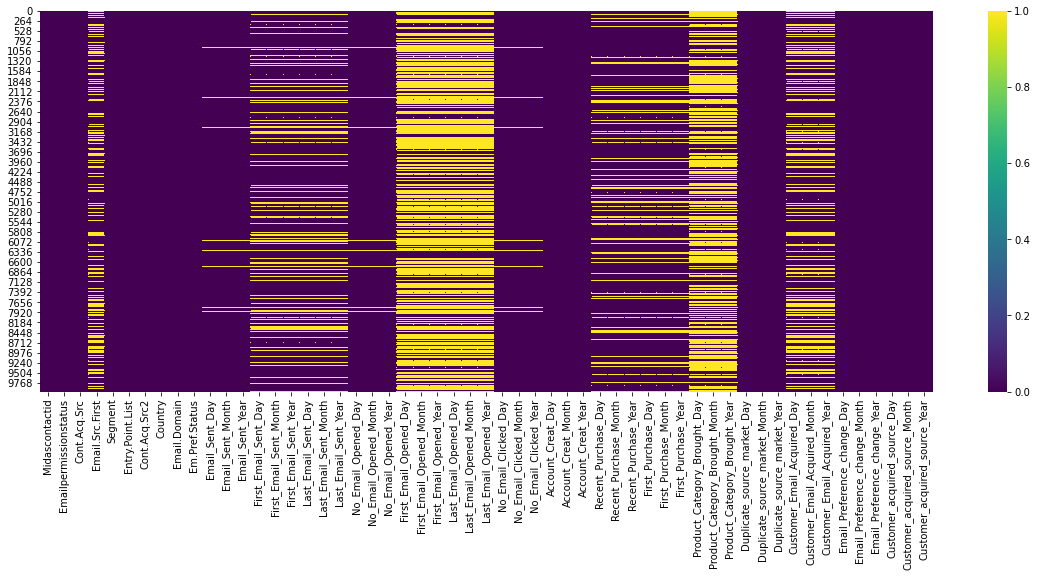

In [31]:
plt.figure(figsize=(20,7))
sns.heatmap(df.isnull(), cmap='viridis')

In [32]:
df['Email_Sent_Day'] = df['Email_Sent_Day'].fillna(1.0)

In [33]:
df['Email_Sent_Month'].value_counts()

1.0    9859
Name: Email_Sent_Month, dtype: int64

In [34]:
df['Email_Sent_Month'] = df['Email_Sent_Month'].fillna(1.0)

In [35]:
df['Email_Sent_Year'].value_counts()

1970.0    9859
Name: Email_Sent_Year, dtype: int64

In [36]:
df['Email_Sent_Year'] = df['Email_Sent_Year'].fillna(1970.0)

In [37]:
df['No_Email_Opened_Day'].value_counts()

1.0    9859
Name: No_Email_Opened_Day, dtype: int64

In [38]:
df['No_Email_Opened_Day'] = df['No_Email_Opened_Day'].fillna(1.0)

In [39]:
df['No_Email_Opened_Month'].value_counts()

1.0    9859
Name: No_Email_Opened_Month, dtype: int64

In [40]:
df['No_Email_Opened_Month'] = df['No_Email_Opened_Month'].fillna(1.0)

In [41]:
df['No_Email_Opened_Year'].value_counts()

1970.0    9859
Name: No_Email_Opened_Year, dtype: int64

In [42]:
df['No_Email_Opened_Year'] = df['No_Email_Opened_Year'].fillna(1970.0)

In [43]:
df.columns

Index(['Midascontactid', 'Emailpermissionstatus', 'Cont.Acq.Src',
       'Email.Src.First', 'Segment', 'Entry.Point.List', 'Cont.Acq.Src2',
       'Country', 'Email.Domain', 'Em.Pref.Status', 'Email_Sent_Day',
       'Email_Sent_Month', 'Email_Sent_Year', 'First_Email_Sent_Day',
       'First_Email_Sent_Month', 'First_Email_Sent_Year',
       'Last_Email_Sent_Day', 'Last_Email_Sent_Month', 'Last_Email_Sent_Year',
       'No_Email_Opened_Day', 'No_Email_Opened_Month', 'No_Email_Opened_Year',
       'First_Email_Opened_Day', 'First_Email_Opened_Month',
       'First_Email_Opened_Year', 'Last_Email_Opened_Day',
       'Last_Email_Opened_Month', 'Last_Email_Opened_Year',
       'No_Email_Clicked_Day', 'No_Email_Clicked_Month',
       'No_Email_Clicked_Year', 'Account_Creat_Day', 'Account_Creat_Month',
       'Account_Creat_Year', 'Recent_Purchase_Day', 'Recent_Purchase_Month',
       'Recent_Purchase_Year', 'First_Purchase_Day', 'First_Purchase_Month',
       'First_Purchase_Year', 'Produc

<AxesSubplot:>

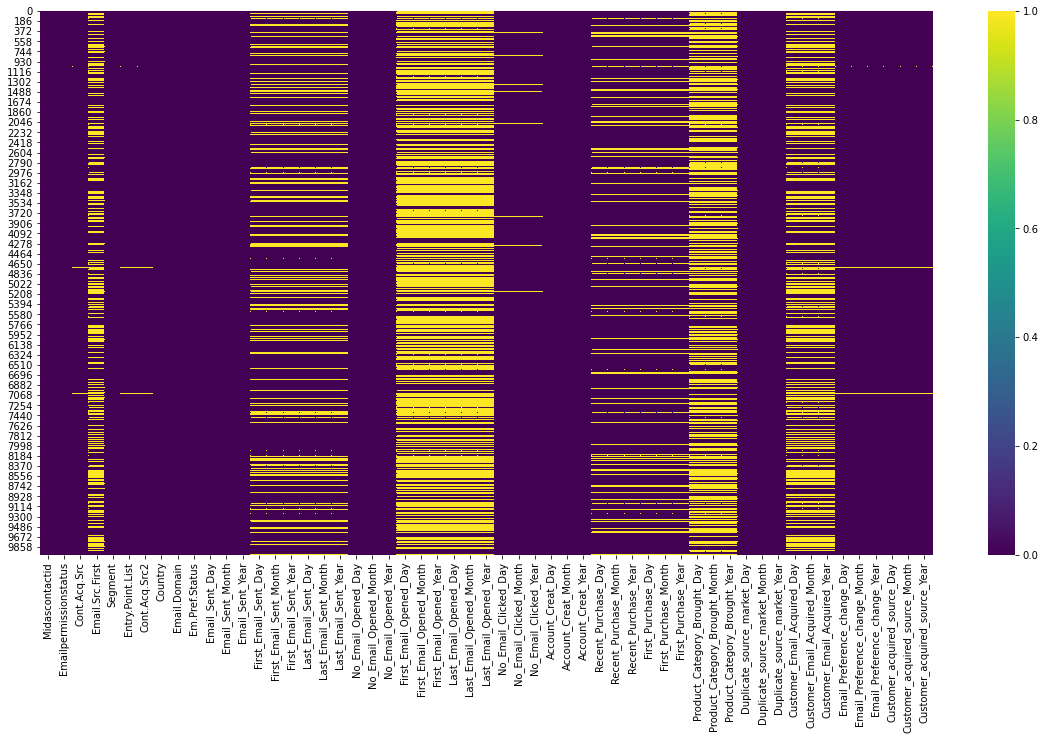

In [44]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(), cmap='viridis')

In [45]:
df['First_Email_Sent_Day'].mode()[0]

25.0

In [46]:
df['First_Email_Sent_Day'] = df['First_Email_Sent_Day'].fillna(df['First_Email_Sent_Day'].mode()[0])

In [47]:
df['First_Email_Sent_Month'].mode()[0]

11.0

In [48]:
df['First_Email_Sent_Month'] = df['First_Email_Sent_Month'].fillna(df['First_Email_Sent_Month'].mode()[0])

In [49]:
df['First_Email_Sent_Year'].value_counts()

2019.0    6549
2020.0    1040
2017.0     184
2016.0      71
2018.0      35
Name: First_Email_Sent_Year, dtype: int64

In [50]:
df['First_Email_Sent_Year'] = df['First_Email_Sent_Year'].fillna(2019.0)

In [51]:
df['Last_Email_Sent_Day'].mode()[0]

24.0

In [52]:
df['Last_Email_Sent_Day'] = df['Last_Email_Sent_Day'].fillna(df['Last_Email_Sent_Day'].mode()[0])

In [53]:
df['Last_Email_Sent_Month'].isnull().sum()

2121

In [54]:
df['Last_Email_Sent_Month'] = df['Last_Email_Sent_Month'].fillna(df['Last_Email_Sent_Month'].median())

In [55]:
df['Last_Email_Sent_Year'].value_counts()

2020.0    4367
2019.0    3472
2017.0      23
2018.0      17
Name: Last_Email_Sent_Year, dtype: int64

In [56]:
df['Last_Email_Sent_Year'] = df['Last_Email_Sent_Year'].fillna(df['Last_Email_Sent_Year'].median())

In [57]:
df['Cont.Acq.Src'] = df['Cont.Acq.Src'].fillna(0)

In [58]:
df['Cont.Acq.Src'].isnull().sum()

0

In [59]:
df['Entry.Point.List'] = df['Entry.Point.List'].fillna(0)

In [60]:
df['Cont.Acq.Src2'] = df['Cont.Acq.Src2'].fillna(0)

In [61]:
df['Country'] = df['Country'].fillna(0)

<AxesSubplot:>

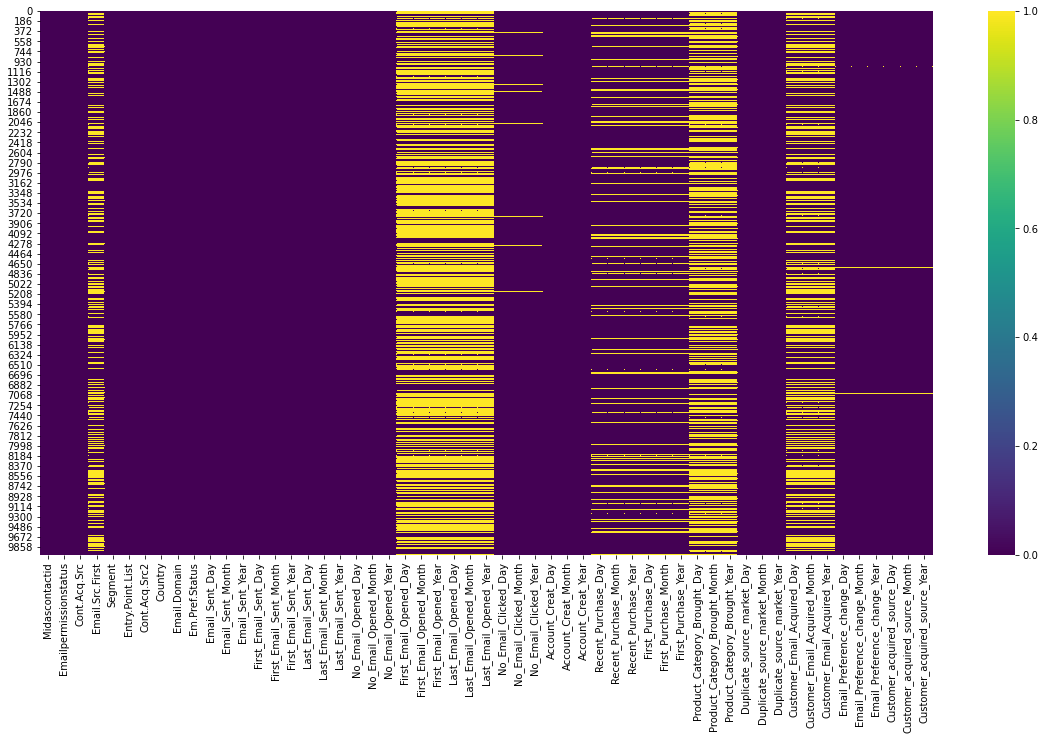

In [62]:
plt.figure(figsize=(20,10))

sns.heatmap(df.isnull(), cmap='viridis')

In [63]:
df['No_Email_Clicked_Day'].value_counts()

1.0    9859
Name: No_Email_Clicked_Day, dtype: int64

In [64]:
df['No_Email_Clicked_Day'] = df['No_Email_Clicked_Day'].fillna(1.0)

In [65]:
df['No_Email_Clicked_Month'].value_counts()

1.0    9859
Name: No_Email_Clicked_Month, dtype: int64

In [66]:
df['No_Email_Clicked_Month'] = df['No_Email_Clicked_Month'].fillna(1.0)

In [67]:
df['No_Email_Clicked_Year'].value_counts()

1970.0    9859
Name: No_Email_Clicked_Year, dtype: int64

In [68]:
df['No_Email_Clicked_Year'] = df['No_Email_Clicked_Year'].fillna(1970.0)

<AxesSubplot:>

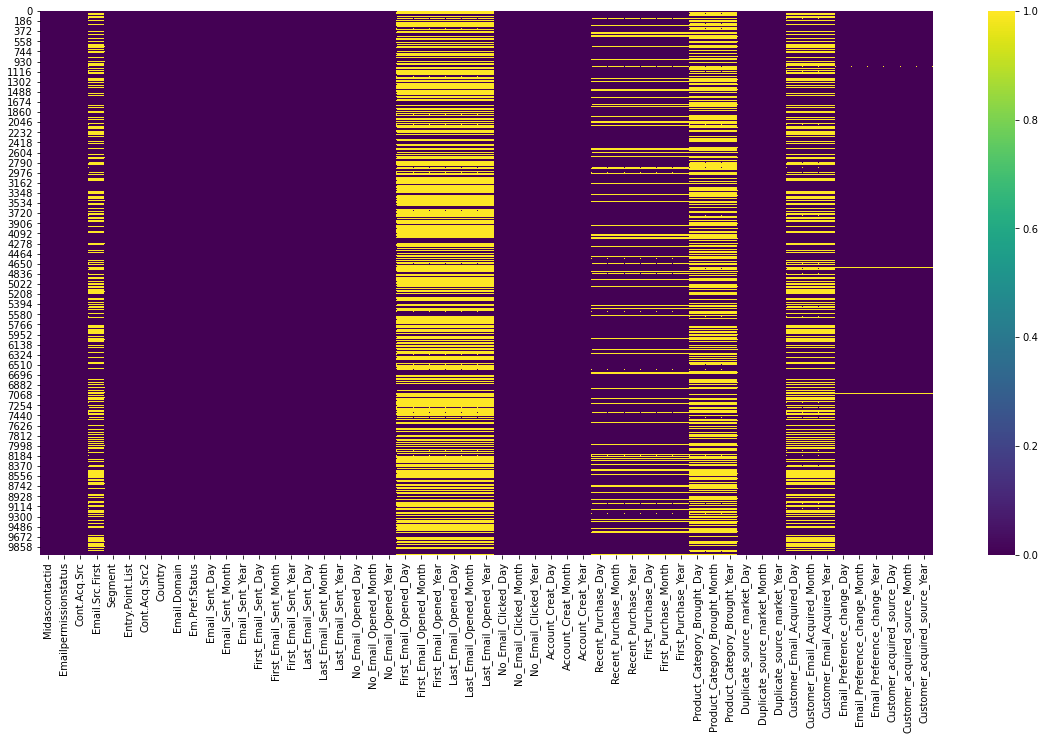

In [69]:
plt.figure(figsize=(20,10))

sns.heatmap(df.isnull(), cmap='viridis')

In [70]:
df['Email_Preference_change_Day'] = df['Email_Preference_change_Day'].fillna(df['Email_Preference_change_Day'].mode()[0])

In [71]:
df['Email_Preference_change_Month'] = df['Email_Preference_change_Month'].fillna(df['Email_Preference_change_Month'].mode()[0])

In [72]:
df['Email_Preference_change_Year'].value_counts()

2019.0    7952
2020.0    1971
2016.0       7
2013.0       3
2012.0       3
2017.0       3
2018.0       2
2015.0       1
2014.0       1
Name: Email_Preference_change_Year, dtype: int64

In [73]:
df['Email_Preference_change_Year'] = df['Email_Preference_change_Year'].fillna(2019.0)

In [74]:
# Dropping the columns which have more number of missing values

df = df.dropna(axis=1)

In [75]:
df.shape

(10000, 33)

In [76]:
df.isnull().any()

Midascontactid                   False
Emailpermissionstatus            False
Cont.Acq.Src                     False
Segment                          False
Entry.Point.List                 False
Cont.Acq.Src2                    False
Country                          False
Email.Domain                     False
Em.Pref.Status                   False
Email_Sent_Day                   False
Email_Sent_Month                 False
Email_Sent_Year                  False
First_Email_Sent_Day             False
First_Email_Sent_Month           False
First_Email_Sent_Year            False
Last_Email_Sent_Day              False
Last_Email_Sent_Month            False
Last_Email_Sent_Year             False
No_Email_Opened_Day              False
No_Email_Opened_Month            False
No_Email_Opened_Year             False
No_Email_Clicked_Day             False
No_Email_Clicked_Month           False
No_Email_Clicked_Year            False
Account_Creat_Day                False
Account_Creat_Month      

In [77]:
df.head()

,Midascontactid,Emailpermissionstatus,Cont.Acq.Src,Segment,Entry.Point.List,Cont.Acq.Src2,Country,Email.Domain,Em.Pref.Status,Email_Sent_Day,...,No_Email_Clicked_Year,Account_Creat_Day,Account_Creat_Month,Account_Creat_Year,Duplicate_source_market_Day,Duplicate_source_market_Month,Duplicate_source_market_Year,Email_Preference_change_Day,Email_Preference_change_Month,Email_Preference_change_Year
0,1020375449,I,LIDUAS16,CON,|LIDUAS1608|OOBAND1407|OOBWIN1506|,LIDUAS16,US,gmail.com,I,1.0,...,1970.0,23,4,2019,24,8,2019,24.0,8.0,2019.0
1,1042778096,U,OOBWIN15,CON,|OOBWIN1506|,OOBWIN15,US,hotmail.com,U,1.0,...,1970.0,16,10,2019,15,10,2019,15.0,10.0,2019.0
2,1039527195,I,NETMINNG,CON,|HYBRIS1506|IGNONE20121024|SAPCRMSHIP120501|,NETMINNG,US,hotmail.com,I,1.0,...,1970.0,29,7,2019,30,7,2019,30.0,7.0,2019.0
3,1008356168,I,EPI2,CON,|HYBRIS1506|LENI2|OOBWIN1407|OOBWIN1506|RI6 PE...,EPI2,US,gmail.com,I,1.0,...,1970.0,29,11,2019,29,11,2019,29.0,11.0,2019.0
4,1038164470,U,OOBWIN15,CON,|OOBWIN1506|,OOBWIN15,US,hotmail.com,U,1.0,...,1970.0,30,4,2019,29,4,2019,29.0,4.0,2019.0


In [78]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
cat_features

['Emailpermissionstatus',
 'Cont.Acq.Src',
 'Segment',
 'Entry.Point.List',
 'Cont.Acq.Src2',
 'Country',
 'Email.Domain',
 'Em.Pref.Status']

In [79]:
df['Emailpermissionstatus'].value_counts()

I    6282
U    3672
O      46
Name: Emailpermissionstatus, dtype: int64

In [80]:
# Label Encoding `Emailpermissionstatus`

df['Emailpermissionstatus'] = df['Emailpermissionstatus'].map({'I' : 0, 'U' : 1, 'O' : 2}).astype('int64')

In [81]:
df.drop(['Cont.Acq.Src'],axis=1,inplace=True)

In [82]:
df['Segment'].value_counts()

CON    9702
AFF     195
VSB      60
EPP      16
SMB      15
CPT       5
PS        5
T2        1
GLB       1
Name: Segment, dtype: int64

In [83]:
# Label Encoding `Segment` column

df['Segment'] = df['Segment'].map({'CON' : 0,
                                  'AFF' : 1,
                                  'VSB' : 2,
                                  'EPP' : 3,
                                  'SMB' : 4,
                                  'CPT' : 5,
                                  'PS' : 6,
                                  'T2' : 7,
                                  'GLB' : 8})

In [84]:
df.drop(['Entry.Point.List'],axis=1,inplace=True)

In [85]:
df.drop(['Cont.Acq.Src2'],axis=1,inplace=True)

In [86]:
df['Country'].value_counts()

US    9447
CA     551
us       2
Name: Country, dtype: int64

In [87]:
# Label Encoding country column

df['Country'] = df['Country'].map({'US' : 0, 'CA' : 1, 'us' : 2})

In [88]:
df.drop(['Email.Domain'],axis=1,inplace=True)

In [89]:
df['Em.Pref.Status'].value_counts()

I    6280
U    3678
O      42
Name: Em.Pref.Status, dtype: int64

In [90]:
# Label Encoding `Em.Pref.Status` column target column

df['Em.Pref.Status'] = df['Em.Pref.Status'].map({'I' : 0, 'U' : 1, 'O' : 2})

In [91]:
df.head()

,Midascontactid,Emailpermissionstatus,Segment,Country,Em.Pref.Status,Email_Sent_Day,Email_Sent_Month,Email_Sent_Year,First_Email_Sent_Day,First_Email_Sent_Month,...,No_Email_Clicked_Year,Account_Creat_Day,Account_Creat_Month,Account_Creat_Year,Duplicate_source_market_Day,Duplicate_source_market_Month,Duplicate_source_market_Year,Email_Preference_change_Day,Email_Preference_change_Month,Email_Preference_change_Year
0,1020375449,0,0,0,0,1.0,1.0,1970.0,3.0,3.0,...,1970.0,23,4,2019,24,8,2019,24.0,8.0,2019.0
1,1042778096,1,0,0,1,1.0,1.0,1970.0,25.0,11.0,...,1970.0,16,10,2019,15,10,2019,15.0,10.0,2019.0
2,1039527195,0,0,0,0,1.0,1.0,1970.0,29.0,7.0,...,1970.0,29,7,2019,30,7,2019,30.0,7.0,2019.0
3,1008356168,0,0,0,0,1.0,1.0,1970.0,29.0,11.0,...,1970.0,29,11,2019,29,11,2019,29.0,11.0,2019.0
4,1038164470,1,0,0,1,1.0,1.0,1970.0,30.0,4.0,...,1970.0,30,4,2019,29,4,2019,29.0,4.0,2019.0


In [92]:
df.drop(['Midascontactid','Em.Pref.Status'],axis=1,inplace=True)
df.head()

,Emailpermissionstatus,Segment,Country,Email_Sent_Day,Email_Sent_Month,Email_Sent_Year,First_Email_Sent_Day,First_Email_Sent_Month,First_Email_Sent_Year,Last_Email_Sent_Day,...,No_Email_Clicked_Year,Account_Creat_Day,Account_Creat_Month,Account_Creat_Year,Duplicate_source_market_Day,Duplicate_source_market_Month,Duplicate_source_market_Year,Email_Preference_change_Day,Email_Preference_change_Month,Email_Preference_change_Year
0,0,0,0,1.0,1.0,1970.0,3.0,3.0,2017.0,20.0,...,1970.0,23,4,2019,24,8,2019,24.0,8.0,2019.0
1,1,0,0,1.0,1.0,1970.0,25.0,11.0,2019.0,24.0,...,1970.0,16,10,2019,15,10,2019,15.0,10.0,2019.0
2,0,0,0,1.0,1.0,1970.0,29.0,7.0,2019.0,20.0,...,1970.0,29,7,2019,30,7,2019,30.0,7.0,2019.0
3,0,0,0,1.0,1.0,1970.0,29.0,11.0,2019.0,13.0,...,1970.0,29,11,2019,29,11,2019,29.0,11.0,2019.0
4,1,0,0,1.0,1.0,1970.0,30.0,4.0,2019.0,24.0,...,1970.0,30,4,2019,29,4,2019,29.0,4.0,2019.0


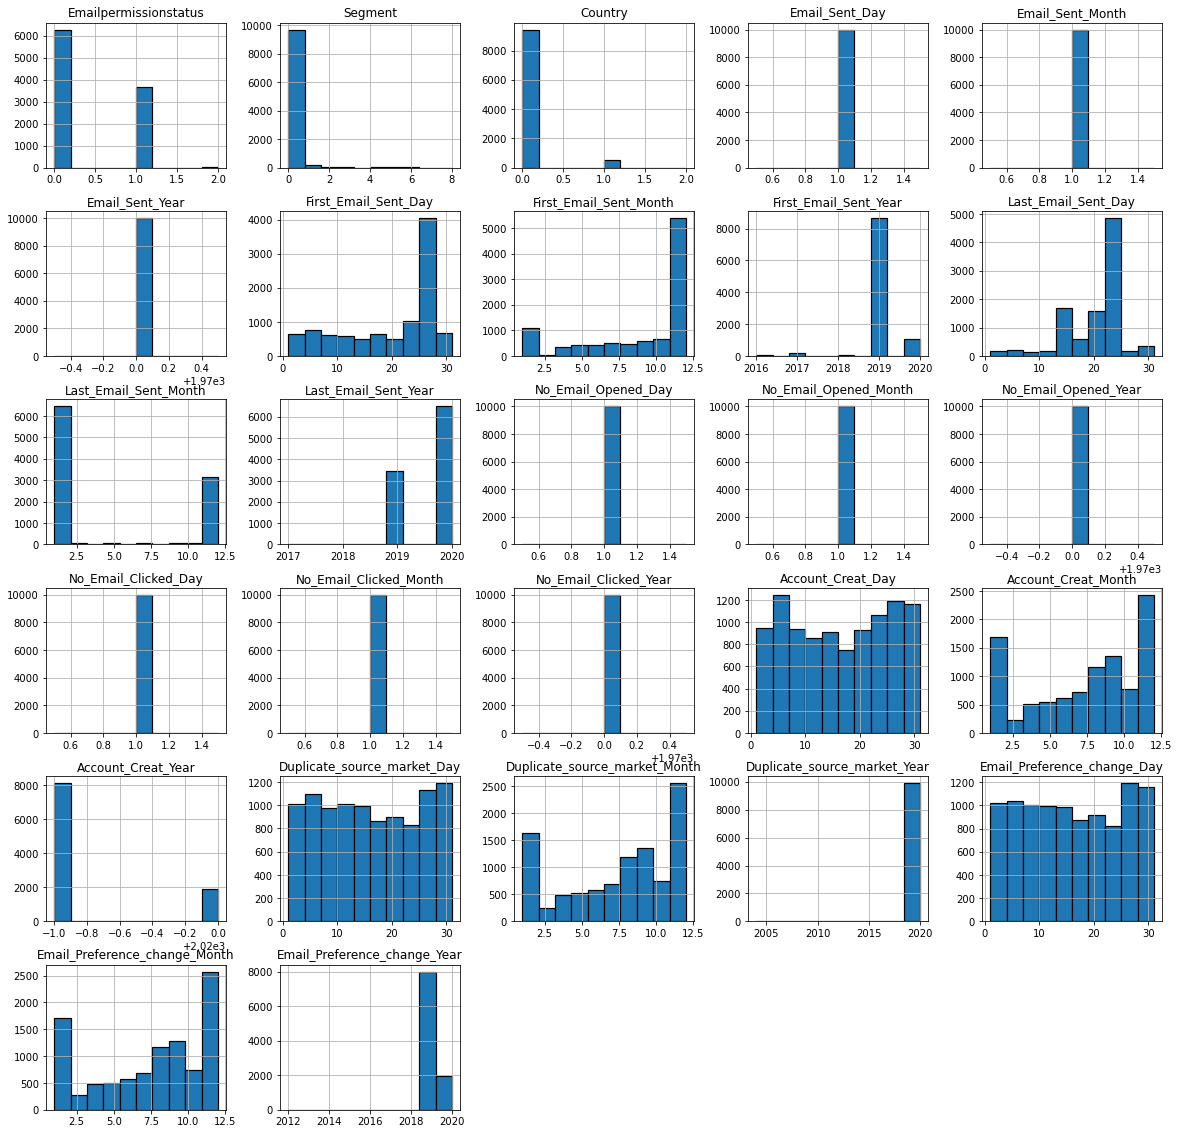

In [93]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

### Train Test splittin the data

In [96]:
X = df.drop(['Emailpermissionstatus'],axis=1)
y = df['Emailpermissionstatus']

In [102]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Applying Machine Learning Algorithm

In [101]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [103]:
dtree_pred = tree.predict(X_test)

In [104]:
dtree_acc = accuracy_score(y_test, dtree_pred)
dtree_acc

0.7823333333333333

In [105]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [106]:
rf_pred = rf.predict(X_test)

In [107]:
rf_acc = accuracy_score(y_test,rf_pred)
rf_acc

0.8126666666666666

In [108]:
import xgboost as xgb

xg_boost = xgb.XGBClassifier()
xg_boost.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [110]:
xgb_pred = xg_boost.predict(X_test)

In [111]:
xgb_acc = accuracy_score(y_test,xgb_pred)
xgb_acc

0.8253333333333334